## EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

### Read Project Data

In [4]:
url = "../20_intermediate_files/project_data_rates.csv"
data = pd.read_csv(url)
data.head()


,Unnamed: 0,CoC Number,Coc,Year,permanent_housing,homeless,poverty,unemployment_rate,Population,Male,...,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Two or More Races,Non Hispanic,Hispanic,Drug Deaths,Suicide Deaths
0,0,AZ-502,"Phoenix,Mesa/Maricopa",2007,52.001543,218.127624,98946.775104,3200.0,3872962,50412.475000,...,87858.904890,4886.079440,2248.950545,3007.620524,231.967161,1766.477440,69301.067245,30698.932755,14.846518,14.665778
1,1,AZ-502,"Phoenix,Mesa/Maricopa",2008,63.740080,181.620069,98615.857511,5100.0,3958263,50450.159578,...,87561.084243,5048.527599,2244.696727,3094.817095,236.568414,1814.305922,68666.685362,31333.314638,13.288657,13.642348
2,2,AZ-502,"Phoenix,Mesa/Maricopa",2009,62.861472,196.091006,98737.277325,8900.0,4023132,50471.871169,...,87320.152558,5202.364725,2218.719147,3163.182317,240.484279,1855.096974,68167.934833,31832.065167,14.068641,13.024678
3,3,AZ-502,"Phoenix,Mesa/Maricopa",2010,78.933918,183.358278,98824.767488,9500.0,3817117,49473.594862,...,85623.940791,5389.722138,2610.949573,3675.155883,264.990567,2435.241047,70429.489062,29570.510938,15.954449,14.775549
4,4,AZ-502,"Phoenix,Mesa/Maricopa",2011,82.933995,150.463014,98699.221313,8500.0,3875371,49431.628611,...,85242.470979,5479.423776,2627.387159,3847.347777,266.142261,2537.228049,70307.797628,29692.202372,16.179096,16.024272


In [5]:
data.columns

Index(['Unnamed: 0', 'CoC Number', 'Coc', 'Year', 'permanent_housing',
       'homeless', 'poverty', 'unemployment_rate', 'Population', 'Male',
       'Female', 'White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian',
       'Native Hawaiian and Other Pacific Islander', 'Two or More Races',
       'Non Hispanic', 'Hispanic', 'Drug Deaths', 'Suicide Deaths'],
      dtype='object')

### Question 1

### What were the cities/counties with the largest amount of homeless people when the Housing First approach was implemented?

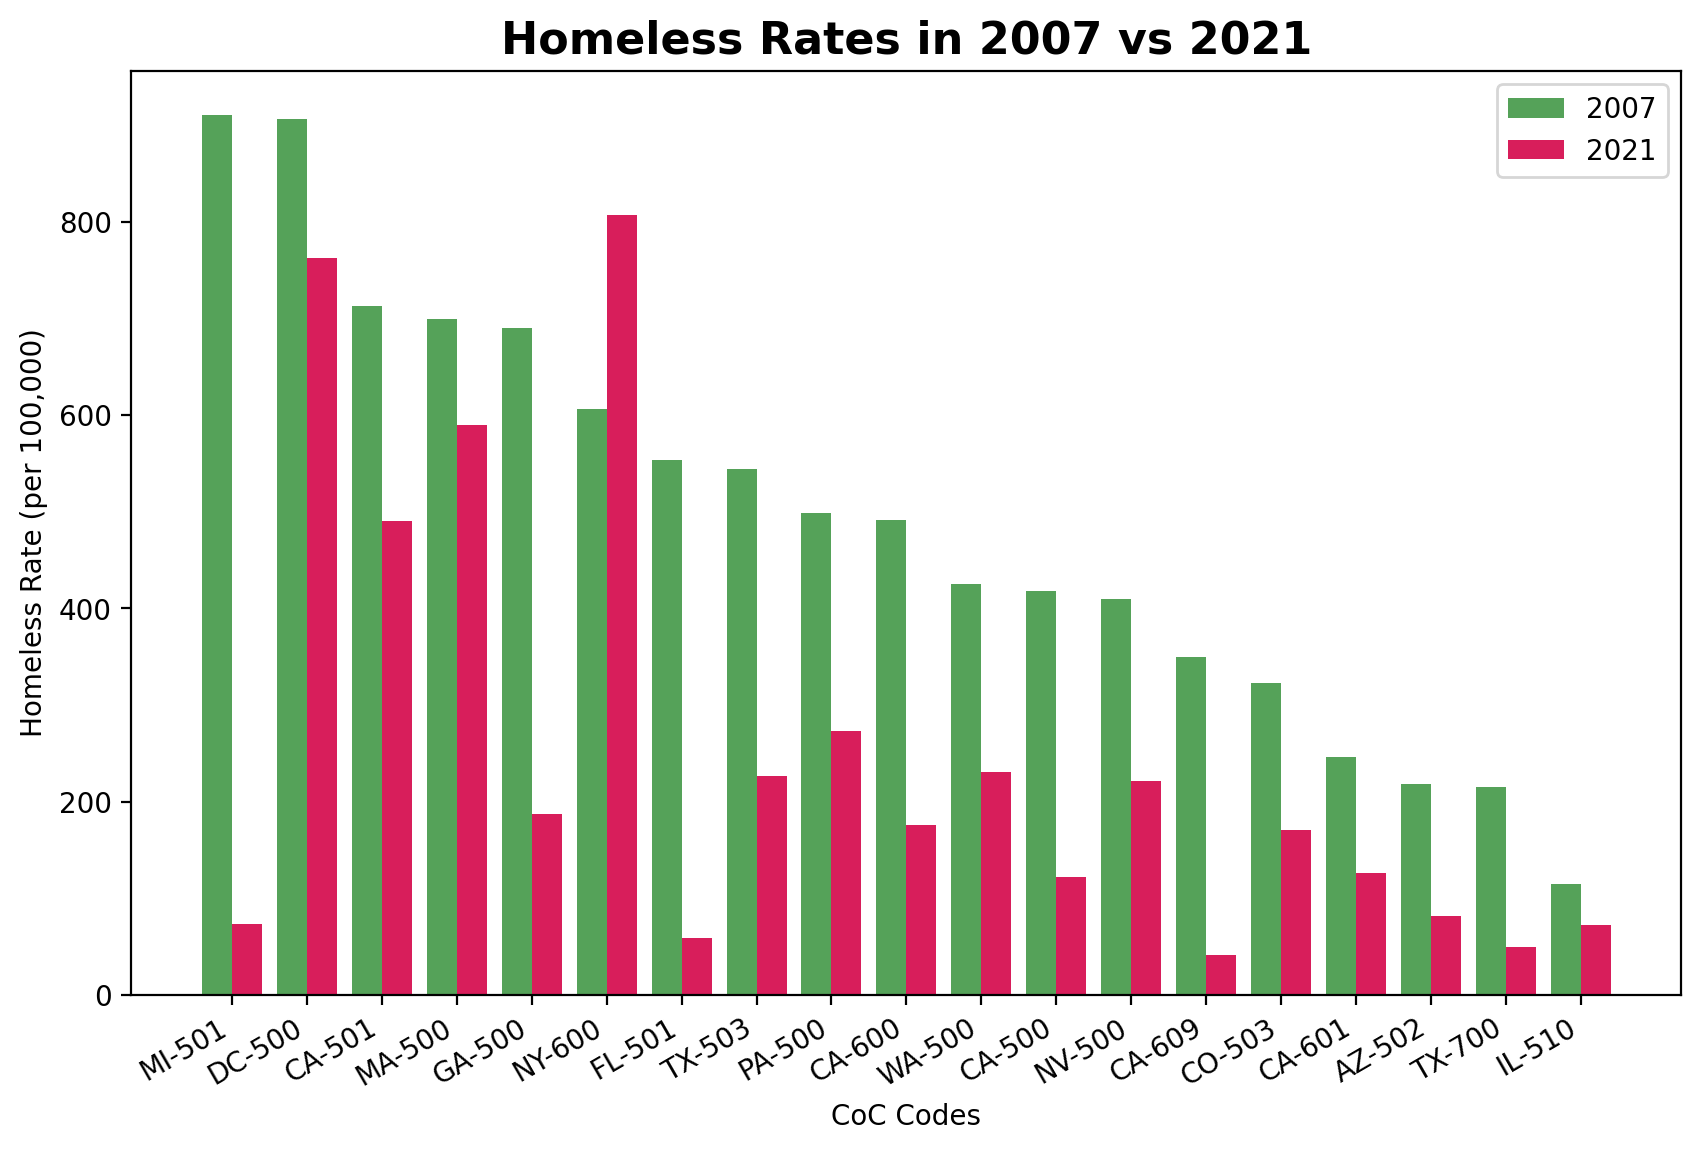

In [7]:
Cocs = data["CoC Number"].unique().tolist()
homeless_07 = []
homeless_21 = []

for i in Cocs:
    tmp_07 = data[(data["CoC Number"] == i) & (data["Year"] == 2007)][
        "homeless"
    ].to_list()
    tmp_21 = data[(data["CoC Number"] == i) & (data["Year"] == 2021)][
        "homeless"
    ].to_list()
    homeless_07.append(tmp_07[0])
    homeless_21.append(tmp_21[0])

# make a dict
homeless_07_21 = {}

for i in range(len(Cocs)):
    tmp_pair = [homeless_07[i], homeless_21[i]]
    homeless_07_21[Cocs[i]] = tmp_pair
# sort the data
sorted_07_21 = sorted(homeless_07_21.items(), key=lambda x: x[1][0], reverse=True)
Cocs_numbers, homeless_data = zip(*sorted_07_21)

# plot the bars for 2007 and 2021
fig, ax = plt.subplots(figsize=(10, 6))
ind = range(len(Cocs_numbers))
width = 0.4
ax.bar(ind, [v[0] for v in homeless_data], width, label="2007", color="#55A259")
ax.bar(
    [i + width for i in ind],
    [v[1] for v in homeless_data],
    width,
    label="2021",
    color="#D81E5B",
)
ax.set_xticks([i + width / 2 for i in ind])
ax.set_xticklabels(Cocs_numbers)
ax.set_xlabel("CoC Codes")
ax.set_ylabel("Homeless Rate (per 100,000)")
ax.set_title("Homeless Rates in 2007 vs 2021", fontsize=16, fontweight='bold')
ax.legend()

plt.xticks(rotation=30, ha="right")
plt.show()

### Q2

### What are the factors that are expected to cause homelessness?

In [8]:
data.columns

Index(['Unnamed: 0', 'CoC Number', 'Coc', 'Year', 'permanent_housing',
       'homeless', 'poverty', 'unemployment_rate', 'Population', 'Male',
       'Female', 'White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian',
       'Native Hawaiian and Other Pacific Islander', 'Two or More Races',
       'Non Hispanic', 'Hispanic', 'Drug Deaths', 'Suicide Deaths'],
      dtype='object')

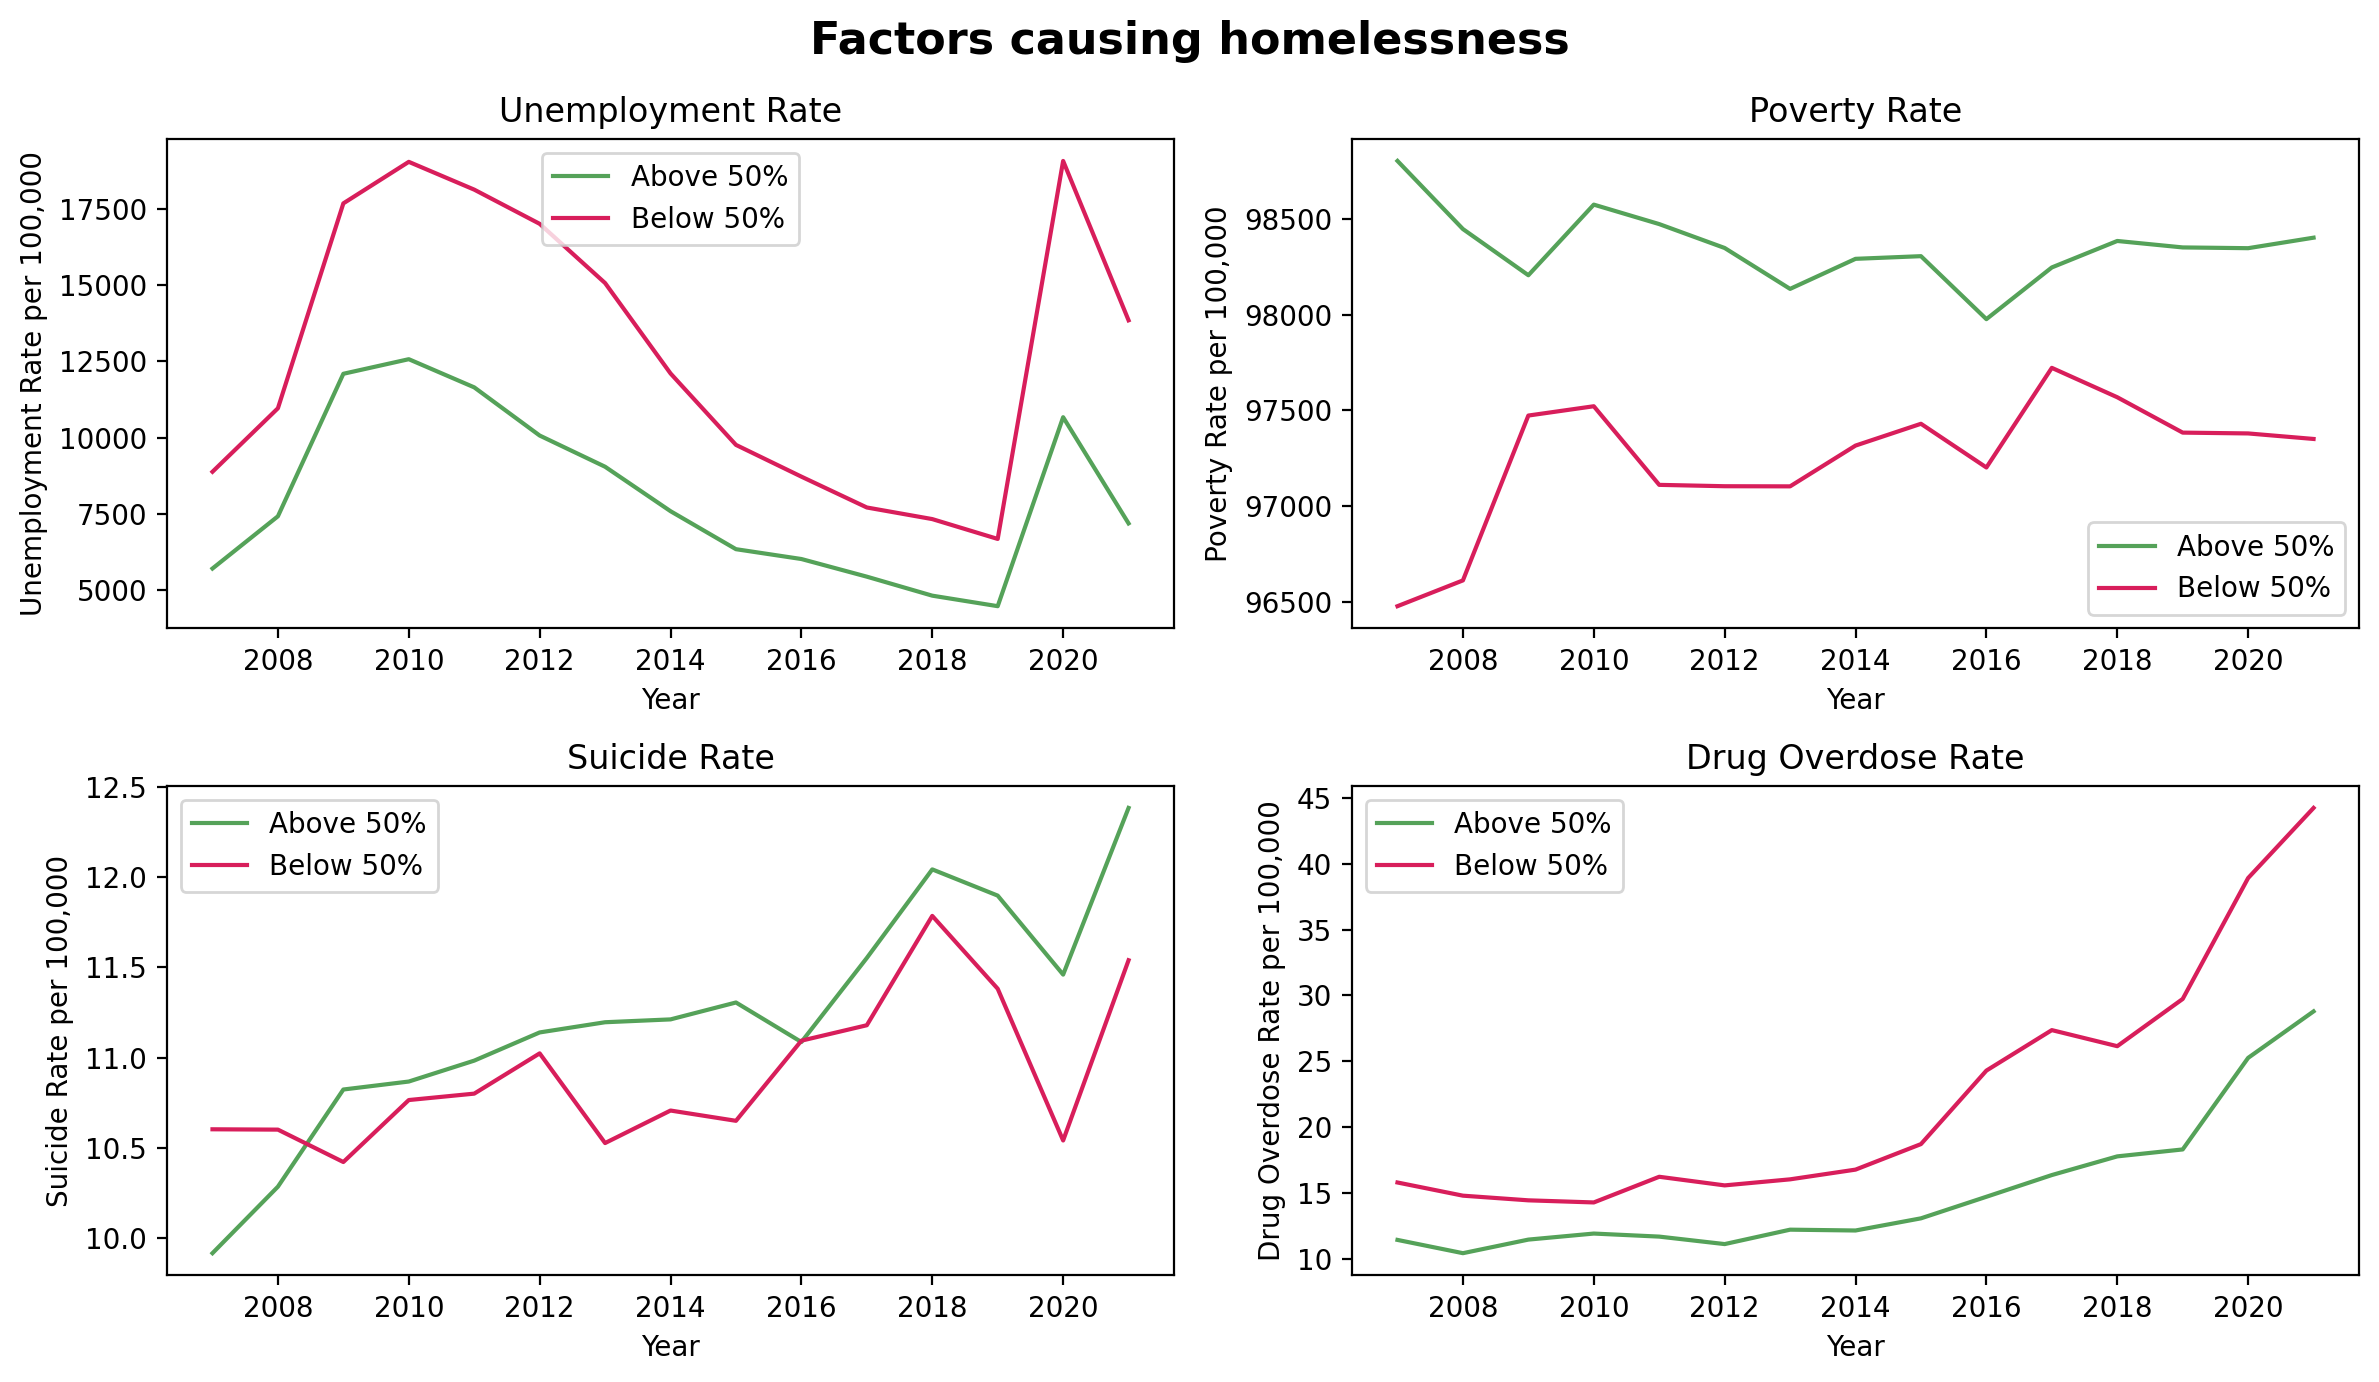

In [9]:
#get homelessness rates reduction for each Coc from 2007 to 2021

def get_rate_reduction(factor, start_year, end_year):
    changes_dict = {}
    tmp_data = data[["Year", "CoC Number", factor]]
    for coc in tmp_data["CoC Number"].unique().tolist():
        tmp_start=  tmp_data[(tmp_data["CoC Number"] == coc)& (tmp_data["Year"] == start_year) ][factor].values
        tmp_end= tmp_data[(tmp_data["CoC Number"] == coc)& (tmp_data["Year"] == end_year) ][factor].values
        change = ((tmp_start - tmp_end)/ tmp_start)*100
        changes_dict[coc] = change[0]
    return changes_dict

get_homeless_rate = get_rate_reduction("homeless", 2007, 2021)
get_homeless_rate

above_50 = {k: v for k, v in get_homeless_rate.items() if v > 50}
below_50 = {k: v for k, v in get_homeless_rate.items() if v < 50}

subset_above_50 = data[data["CoC Number"].isin(list(above_50.keys()))].copy()
subset_below_50 = data[data["CoC Number"].isin(list(below_50.keys()))].copy()

def generate_axes(factor):
    if factor =="unemployment_rate":
        return "Unemployment Rate"
    elif factor == "poverty":
        return "Poverty Rate"
    elif factor == "Suicide Deaths":
        return "Suicide Rate"
    else:
        return "Drug Overdose Rate"
    
years = [i for i in range(2007, 2022)]

factors = ["unemployment_rate", "poverty", "Suicide Deaths", "Drug Deaths"]
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

# group_by
for i, factor in enumerate(factors):
    tmp_grp_by_abv = subset_above_50.groupby(["Year"])[factor].mean().reset_index()
    tmp_grp_by_below = subset_below_50.groupby(["Year"])[factor].mean().reset_index()
    tmp_1 = tmp_grp_by_abv[factor].values.tolist()
    tmp_2 = tmp_grp_by_below[factor].values.tolist()
    factor_label = generate_axes(factor)
    axs[i // 2, i % 2].plot(years, tmp_1, color="#55A259", label="Above 50%")
    axs[i // 2, i % 2].plot(years, tmp_2, color="#D81E5B", label="Below 50%")
    axs[i // 2, i % 2].set_title(factor_label)
    axs[i // 2, i % 2].set_xlabel("Year")
    axs[i // 2, i % 2].set_ylabel(f"{factor_label} per 100,000")
    axs[i // 2, i % 2].legend()

fig.suptitle("Factors causing homelessness", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Q3

### How  do the demographics of the homeless compare with the national average? 

In [15]:
get_hisp_rate = get_rate_reduction("Hispanic", 2007, 2021)
get_non_hisp_rate = get_rate_reduction("Non Hispanic", 2007, 2021)

hisp_reduce = list(get_hisp_rate.values())
non_hisp_reduce = list(get_non_hisp_rate.values())
h_reduce =list(get_homeless_rate.values())
cocs = list(get_homeless_rate.keys())

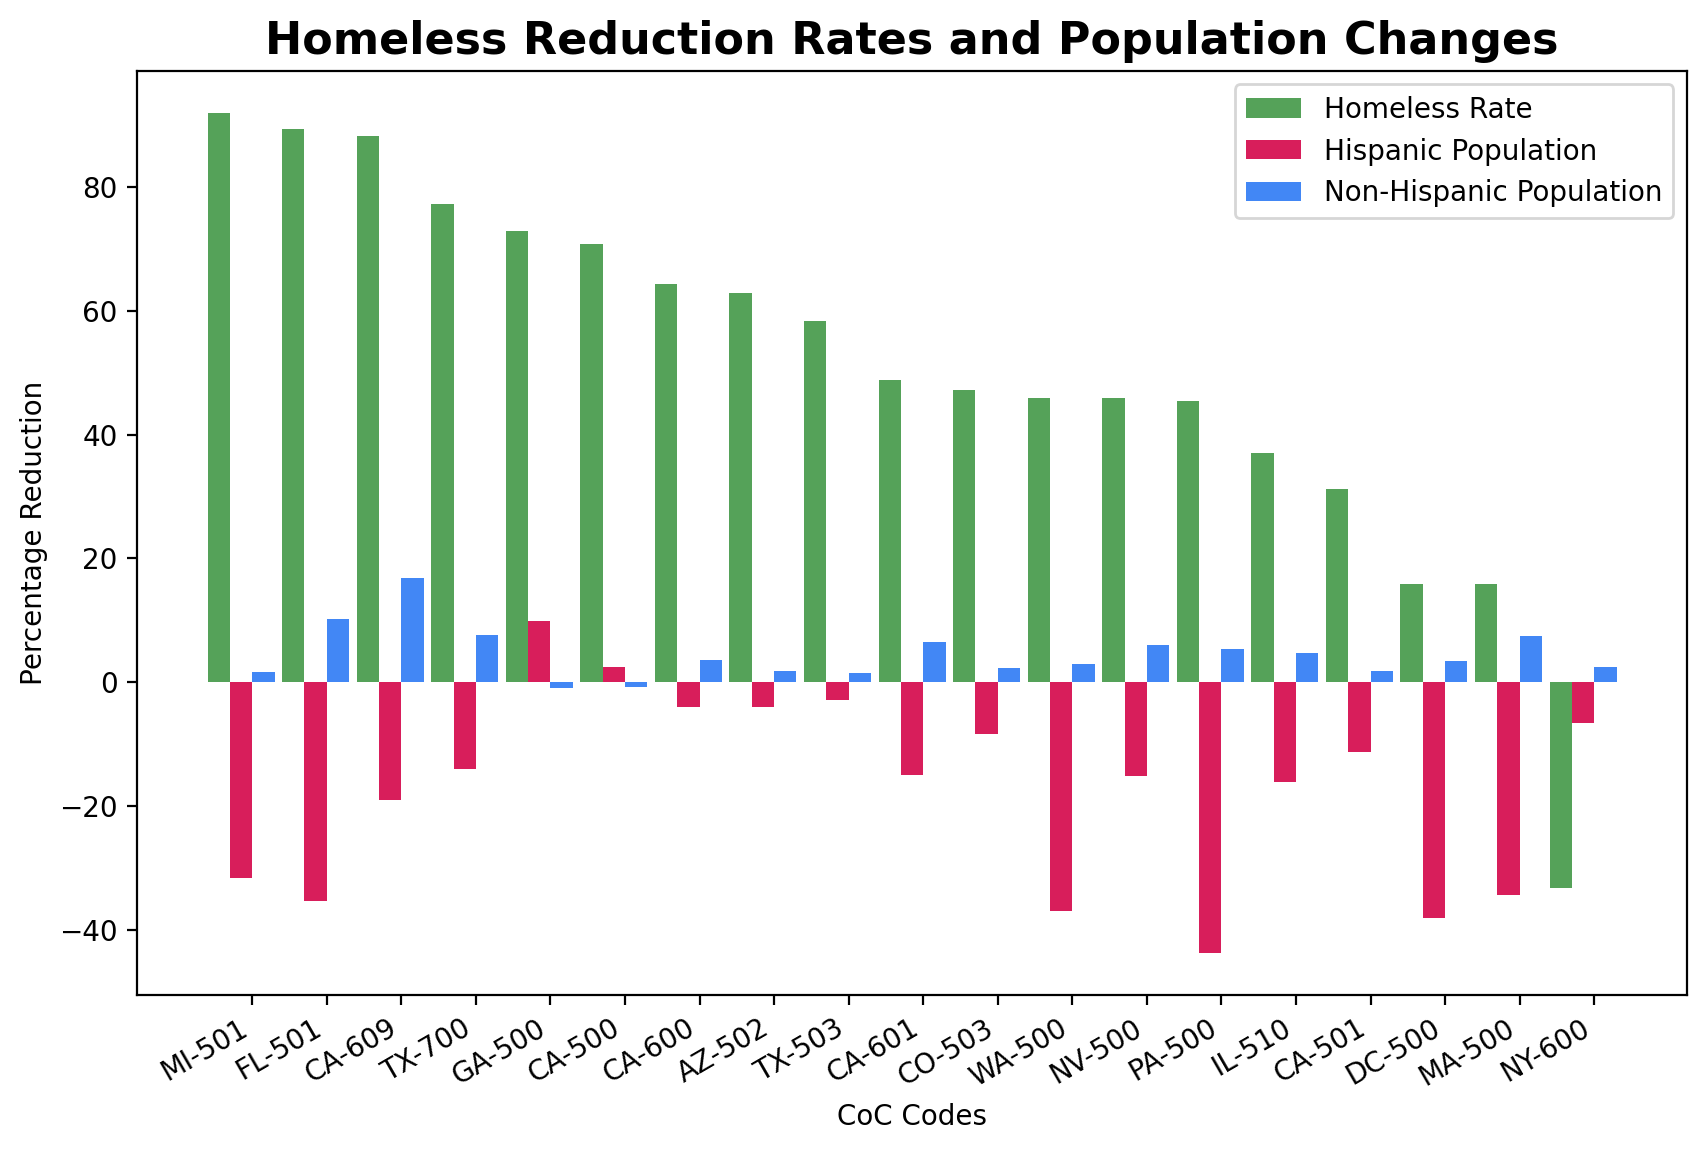

In [16]:
# create a dictionary of the data
homeless_reduce = {}
for i in range(len(cocs)):
    tmp_pair = [h_reduce[i], hisp_reduce[i], non_hisp_reduce[i]]
    homeless_reduce[cocs[i]] = tmp_pair

# sort the data
sorted_homeless_reduce = sorted(homeless_reduce.items(), key=lambda x: x[1][0], reverse=True)
Cocs_numbers, homeless_data = zip(*sorted_homeless_reduce)

fig, ax = plt.subplots(figsize=(10, 6))
ind = range(len(Cocs_numbers))
width = 0.3

ax.bar(ind, [v[0] for v in homeless_data], width, label="Homeless Rate", color="#55A259")
ax.bar([i + width for i in ind], [v[1] for v in homeless_data], width, label="Hispanic Population", color="#D81E5B")
ax.bar([i + 2*width for i in ind], [v[2] for v in homeless_data], width, label="Non-Hispanic Population", color="#4287f5")

ax.set_xticks([i + 1.5*width for i in ind])
ax.set_xticklabels(Cocs_numbers)
ax.set_xlabel("CoC Codes")
ax.set_ylabel("Percentage Reduction")
ax.set_title("Homeless Reduction Rates and Population Changes", fontsize=16, fontweight='bold')
ax.legend()

plt.xticks(rotation=30, ha="right")
plt.show()